<a href="https://colab.research.google.com/github/bhaveshneekhra/mlcb_23/blob/main/UCI_Breast_Cancer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries, connect drive

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from numpy import errstate,isneginf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


import zipfile
import os
import json
import requests
import io
import copy
#import biomart
#import umap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Prepare data

In [ ]:
cols=["Class","age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]
df2= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer-UCI-dataset.data',names=cols)
print(df2.shape)
df2.head()

(286, 10)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
df3=df2
df3.drop("Class", axis=1, inplace=False)
col=df2.iloc[:,0:1]
df3['class']=col
df3.drop("Class", axis=1, inplace=True)
df3.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [ ]:
df3['class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64

In [ ]:
fig = px.histogram(data_frame=df3, x='class', color='class', color_discrete_sequence=['#A865C9', '#f6abb6'])
fig.update_yaxes(tickvals=list(range(0, 251, 25)), title='Frequency')

In [ ]:
df3.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'class'],
      dtype='object')

In [ ]:
df3.age.unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

# Label Encoding

In [ ]:
labeldf=df3.copy(deep=True)
le = LabelEncoder()
labeldf['age'] = le.fit_transform(labeldf['age'])
labeldf['menopause'] = le.fit_transform(labeldf['menopause'])
labeldf['tumor-size'] = le.fit_transform(labeldf['tumor-size'])
labeldf['inv-nodes'] = le.fit_transform(labeldf['inv-nodes'])
labeldf['node-caps'] = le.fit_transform(labeldf['node-caps'])
labeldf['deg-malig'] = le.fit_transform(labeldf['deg-malig'])
labeldf['breast'] = le.fit_transform(labeldf['breast'])
labeldf['breast-quad'] = le.fit_transform(labeldf['breast-quad'])
labeldf['irradiat']=le.fit_transform(labeldf['irradiat'])
labeldf['class']=le.fit_transform(labeldf['class'])
labeldf

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,1,2,5,0,1,2,0,2,0,0
1,2,2,3,0,1,1,1,5,0,0
2,2,2,3,0,1,1,0,2,0,0
3,4,0,2,0,1,1,1,3,0,0
4,2,2,0,0,1,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...
281,1,2,5,0,1,1,0,3,0,1
282,1,2,3,0,1,2,0,3,1,1
283,4,0,3,0,1,0,1,3,0,1
284,2,0,5,4,1,2,0,2,0,1


In [ ]:
labeldf["class"].value_counts()

0    201
1     85
Name: class, dtype: int64

# One-Hot Encoding

In [ ]:
onehotdf=df3.copy(deep=True)
encoder = OneHotEncoder()

encoded_data = pd.DataFrame()

for column in df3.columns:
    encoded_column = encoder.fit_transform(onehotdf[[column]]).toarray()

    feature_names = encoder.get_feature_names_out([column])

    encoded_column_df = pd.DataFrame(encoded_column, columns=feature_names)

    encoded_data = pd.concat([encoded_data, encoded_column_df], axis=1)

encoded_data.drop('class_no-recurrence-events', axis=1, inplace=True)
encoded_data


,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,...,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes,class_recurrence-events
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
282,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
283,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
284,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Train Test Split

In [ ]:
X = labeldf.drop(columns=["class"])
y = labeldf['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=55, shuffle=True)

In [ ]:
print(X_train.shape, X_test.shape)

(228, 9) (58, 9)


#Decision Tree

In [ ]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [ ]:
dt_predictions = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_b_accuracy = balanced_accuracy_score(y_test, dt_predictions)
print(dt_accuracy)
print(dt_b_accuracy)
dt_f1 = f1_score(y_test, dt_predictions, average='macro')
print(dt_f1)

0.6379310344827587
0.5200860832137734
0.5172413793103448


In [ ]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.33      0.24      0.28        17

    accuracy                           0.64        58
   macro avg       0.53      0.52      0.52        58
weighted avg       0.60      0.64      0.62        58



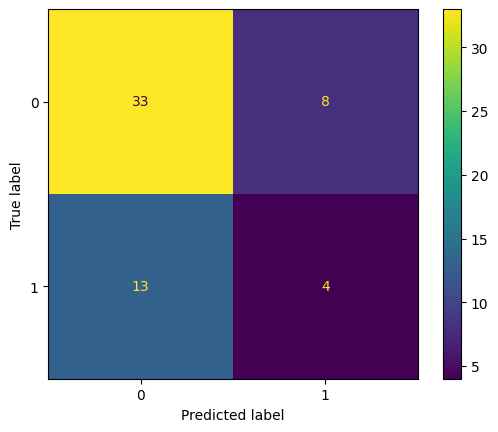

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions)

In [ ]:
X = labeldf.iloc[:, :-1]
y = labeldf['class']
m=[]

skf = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = tree.DecisionTreeClassifier()
#     print(train_index.shape)
#     print(test_index.shape)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    b_accuracy = balanced_accuracy_score(y_test, predictions)
    f1score = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')

    print(accuracy, end='\t')
    m.append(accuracy)
    print(b_accuracy, end='\t')
    print(f1score, end='\t')
    print(precision, end='\t')
    print(recall)

0.7068965517241379	0.603299856527977	0.6900515259611573	0.6844077961019491	0.7068965517241379
0.6842105263157895	0.6058823529411765	0.6781931964056482	0.6738512949039264	0.6842105263157895
0.5789473684210527	0.5816176470588235	0.5967190704032809	0.6484730344379467	0.5789473684210527
0.6491228070175439	0.6147058823529412	0.6583564173591874	0.6736285157337789	0.6491228070175439
0.6140350877192983	0.5389705882352941	0.6140350877192983	0.6140350877192983	0.6140350877192983


In [ ]:
from statistics import mean
mean(m)

0.6466424682395644

In [ ]:
X = encoded_data.iloc[:, :-1]
y = encoded_data['class_recurrence-events']
m=[]

skf = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = tree.DecisionTreeClassifier()
#     print(train_index.shape)
#     print(test_index.shape)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    b_accuracy = balanced_accuracy_score(y_test, predictions)
    f1score = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')

    print(accuracy, end='\t')
    m.append(accuracy)
    print(b_accuracy, end='\t')
    print(f1score, end='\t')
    print(precision, end='\t')
    print(recall)

0.7413793103448276	0.6621233859397417	0.7334293005300007	0.7297917599641737	0.7413793103448276
0.7192982456140351	0.5970588235294118	0.6888725309777941	0.6920077972709552	0.7192982456140351
0.5789473684210527	0.4970588235294118	0.5789473684210527	0.5789473684210527	0.5789473684210527
0.6666666666666666	0.5933823529411765	0.6636737747848859	0.6610772357723577	0.6666666666666666
0.6140350877192983	0.5220588235294118	0.6066805733846812	0.6006683375104428	0.6140350877192983


In [ ]:
from statistics import mean
mean(m)

0.6640653357531761

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)

In [ ]:
rf_clf.score(X_test,y_test)

0.6491228070175439

In [ ]:
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_b_accuracy = balanced_accuracy_score(y_test, rf_predictions)
print(rf_accuracy)
print(rf_b_accuracy)
rf_f1 = f1_score(y_test, rf_predictions, average='macro')
print(rf_f1)

0.6491228070175439
0.513235294117647
0.5017482517482518


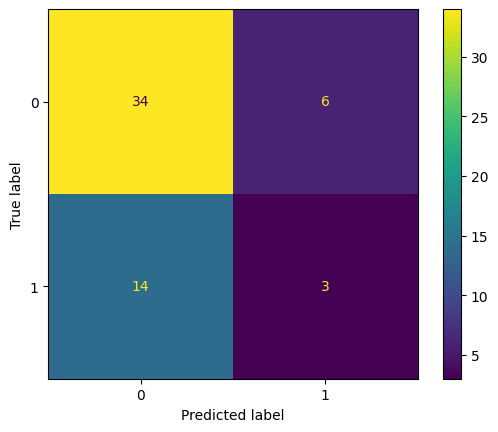

In [ ]:
rf_disp = ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions)

In [ ]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        40
           1       0.33      0.18      0.23        17

    accuracy                           0.65        57
   macro avg       0.52      0.51      0.50        57
weighted avg       0.60      0.65      0.61        57



In [ ]:
X = labeldf.iloc[:, :-1]
y = labeldf['class']
m=[]
q=[]

skf = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(n_estimators=10)
#     print(train_index.shape)
#     print(test_index.shape)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    b_accuracy = balanced_accuracy_score(y_test, predictions)
    f1score = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')

    print(accuracy, end='\t')
    m.append(accuracy)
    print(b_accuracy, end='\t')
    print(f1score, end='\t')
    print(precision, end='\t')
    q.append(precision)
    print(recall)

0.7931034482758621	0.6470588235294118	0.7498832788634696	0.8399479505530254	0.7931034482758621
0.7543859649122807	0.6558823529411765	0.7366381068951449	0.7389917481450662	0.7543859649122807
0.6842105263157895	0.6058823529411765	0.6781931964056482	0.6738512949039264	0.6842105263157895
0.7368421052631579	0.6264705882352941	0.7133158566915372	0.7164613661814109	0.7368421052631579
0.6842105263157895	0.5720588235294117	0.6613918517223291	0.6542542126066153	0.6842105263157895


In [ ]:
from statistics import mean
mean(m)


0.7305505142165759

In [ ]:
X = encoded_data.iloc[:, :-1]
y = encoded_data['class_recurrence-events']
m=[]

skf = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(n_estimators=10)
#     print(train_index.shape)
#     print(test_index.shape)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    b_accuracy = balanced_accuracy_score(y_test, predictions)
    f1score = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')

    print(accuracy, end='\t')
    m.append(accuracy)
    print(b_accuracy, end='\t')
    print(f1score, end='\t')
    print(precision, end='\t')
    print(recall)

0.7413793103448276	0.6276901004304161	0.7180248826897413	0.7207614942528736	0.7413793103448276
0.7543859649122807	0.6558823529411765	0.7366381068951449	0.7389917481450662	0.7543859649122807
0.7368421052631579	0.6095588235294118	0.7027794204612655	0.7162996777658431	0.7368421052631579
0.6842105263157895	0.5551470588235294	0.6499815973500184	0.6442495126705653	0.6842105263157895
0.7017543859649122	0.6014705882352941	0.6848154869933453	0.6793372319688109	0.7017543859649122


In [ ]:
from statistics import mean
mean(m)

0.7237144585601936

# Logistic Regression Classifier

In [ ]:
lrg = LogisticRegression(n_jobs=-1)
lrg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [ ]:
predictions = lrg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
b_accuracy = balanced_accuracy_score(y_test, predictions)
print(accuracy)
print(b_accuracy)
f1 = f1_score(y_test, predictions, average='macro')
print(f1)

0.7543859649122807
0.6220588235294118
0.6305555555555555


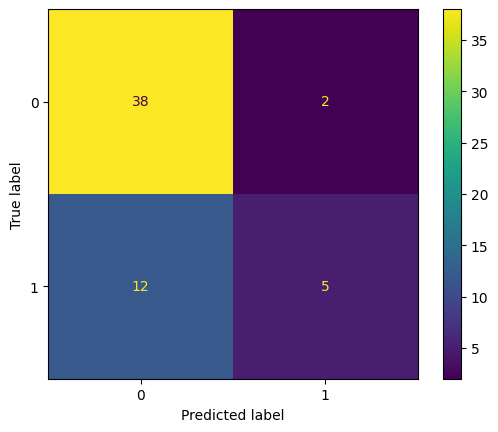

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=lrg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=lrg.classes_)
disp.plot()

plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        40
           1       0.71      0.29      0.42        17

    accuracy                           0.75        57
   macro avg       0.74      0.62      0.63        57
weighted avg       0.75      0.75      0.72        57



In [ ]:
X = labeldf.iloc[:, :-1]
y = labeldf['class']
m=[]


skf = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(n_jobs=-1, multi_class='ovr')
    #print(X_train.shape)
    #print(X_test.shape)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    b_accuracy = balanced_accuracy_score(y_test, predictions)
    f1score = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')



    print(accuracy, end='\t')
    m.append(accuracy)
    print(b_accuracy, end='\t')
    print(f1score, end='\t')
    print(precision, end='\t')
    print(recall)


0.7241379310344828	0.6327116212338594	0.7121625233894678	0.7076333628057767	0.7241379310344828
0.8070175438596491	0.6933823529411764	0.7820382416715949	0.8195041174364482	0.8070175438596491
0.7192982456140351	0.6139705882352942	0.6990149793087369	0.6966229803758409	0.7192982456140351
0.6491228070175439	0.5470588235294118	0.6340852130325815	0.6250766777082567	0.6491228070175439
0.7543859649122807	0.6220588235294118	0.7168615984405459	0.7463659147869675	0.7543859649122807


In [ ]:
import statistics
print(statistics.mean(m))

0.7307924984875983


# SVM classifier

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [ ]:
predictions_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, predictions_svc)
b_accuracy_svc = balanced_accuracy_score(y_test, predictions_svc)
print(accuracy_svc)
print(b_accuracy_svc)

0.7368421052631579
0.5926470588235294


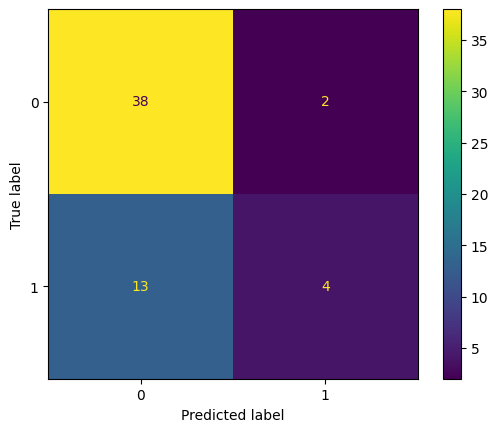

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions_svc)

In [ ]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        40
           1       0.67      0.24      0.35        17

    accuracy                           0.74        57
   macro avg       0.71      0.59      0.59        57
weighted avg       0.72      0.74      0.69        57



In [ ]:
X = labeldf.iloc[:, :-1]
y = labeldf['class']
m_svc=[]
skf = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_svc = LinearSVC()
#     print(train_index.shape)
#     print(test_index.shape)

    model_svc.fit(X_train, y_train)
    predictions_svc = model_svc.predict(X_test)
    accuracy_svc = accuracy_score(y_test, predictions_svc)
    b_accuracy_svc = balanced_accuracy_score(y_test, predictions_svc)
    f1score_svc = f1_score(y_test, predictions_svc, average='weighted')
    precision_svc = precision_score(y_test, predictions_svc, average='weighted')
    recall_svc = recall_score(y_test, predictions_svc, average='weighted')

    print(accuracy_svc, end='\t')
    m_svc.append(accuracy_svc)
    print(b_accuracy_svc, end='\t')
    print(f1score_svc, end='\t')
    print(precision_svc, end='\t')
    print(recall_svc)

0.7413793103448276	0.6449067431850789	0.7265160523186683	0.7242003998001	0.7413793103448276
0.7719298245614035	0.6345588235294117	0.7311757655007082	0.7851737186102511	0.7719298245614035
0.7368421052631579	0.6264705882352941	0.7133158566915372	0.7164613661814109	0.7368421052631579
0.6491228070175439	0.5470588235294118	0.6340852130325815	0.6250766777082567	0.6491228070175439
0.7368421052631579	0.5926470588235294	0.6898181909623557	0.7217062263501892	0.7368421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
import statistics
print(statistics.mean(m_svc))


0.7272232304900181


##MLP

In [ ]:
nn_clf = MLPClassifier(hidden_layer_sizes=[10, 10], solver='sgd', batch_size=256, max_iter=100)
nn_clf.fit(X_train, y_train)
nn_preds = nn_clf.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_balanced_accuracy = balanced_accuracy_score(y_test, nn_preds)
print(nn_accuracy)

0.7017543859649122


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning:

Got `batch_size` less than 1 or larger than sample size. It is going to be clipped

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



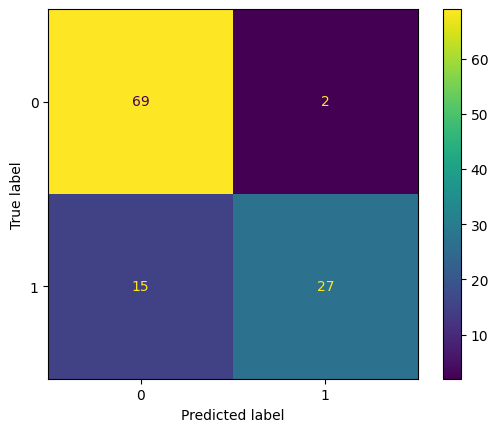

In [ ]:
nn_disp = ConfusionMatrixDisplay.from_predictions(y_test, nn_preds)

In [ ]:
print(classification_report(y_test, nn_preds))

In [ ]:
X = labeldf.iloc[:, :-1]
y = labeldf['class']
m=[]

skf = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     print(train_index.shape)
#     print(test_index.shape)
    model = MLPClassifier(hidden_layer_sizes=[10, 10], solver='sgd', batch_size=256, max_iter=100)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    b_accuracy = balanced_accuracy_score(y_test, predictions)
    f1score = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')

    print(accuracy, end='\t')
    m.append(accuracy)
    print(b_accuracy, end='\t')
    print(f1score, end='\t')
    #print(precision, end='\t')
    print(recall)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning:

Got `batch_size` less than 1 or larger than sample size. It is going to be clipped

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning:

Got `batch_size` less than 1 or larger than sample size. It is going to be clipped



0.6724137931034483	0.49282639885222385	0.5934318555008211	0.6724137931034483
0.6140350877192983	0.4713235294117647	0.5721997300944669	0.6140350877192983
0.7017543859649122	0.5	0.5787665038885874	0.7017543859649122


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning:

Got `batch_size` less than 1 or larger than sample size. It is going to be clipped

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning:

Got `batch_size` less than 1 or larger than sample size. It is going to be clipped

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations 

0.7017543859649122	0.5	0.5787665038885874	0.7017543859649122
0.6842105263157895	0.5044117647058823	0.5972004479283316	0.6842105263157895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning:

Got `batch_size` less than 1 or larger than sample size. It is going to be clipped

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [ ]:
import statistics
print(statistics.mean(m))



0.6748336358136721


#Federated

In [ ]:
X = labeldf.iloc[:, :-1]
y = labeldf['class']

X_temp, X_subset1, y_temp, y_subset1 = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)
X_subset2, X_subset3, y_subset2, y_subset3 = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
print("Subset 1:", X_subset1.shape, y_subset1.shape)
print("Subset 2:", X_subset2.shape, y_subset2.shape)
print("Subset 3:", X_subset3.shape, y_subset3.shape)

Subset 1: (96, 9) (96,)
Subset 2: (95, 9) (95,)
Subset 3: (95, 9) (95,)


In [ ]:
print(y_subset1.value_counts())
print(y_subset2.value_counts())
print(y_subset3.value_counts())

0    67
1    29
Name: class, dtype: int64
0    67
1    28
Name: class, dtype: int64
0    67
1    28
Name: class, dtype: int64


In [ ]:
def zscore(col):

  col = sc.zscore(col.astype('float'))
  return col

def prepare_data(random_state):


  X = labeldf.iloc[:, :-1]
  y = labeldf['class']

  global X_site1, y_site1, X_site2, y_site2, X_site3, y_site3


  X_temp, X_site1, y_temp, y_site1 = train_test_split(X, y, test_size=1/3, stratify=y, random_state=random_state)
  X_site2, X_site3, y_site2, y_site3 = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=random_state)


  X_site1 = X_site1.apply(zscore, axis=0)
  X_site2 = X_site2.apply(zscore, axis=0)
  X_site3 = X_site3.apply(zscore, axis=0)


  global X_site1_train, X_site1_test, y_site1_train, y_site1_test
  X_site1_train, X_site1_test, y_site1_train, y_site1_test = train_test_split(X_site1, y_site1, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site1)

  global X_site2_train, X_site2_test, y_site2_train, y_site2_test
  X_site2_train, X_site2_test, y_site2_train, y_site2_test = train_test_split(X_site2, y_site2, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site2)

  global X_site3_train, X_site3_test, y_site3_train, y_site3_test
  X_site3_train, X_site3_test, y_site3_train, y_site3_test = train_test_split(X_site3, y_site3, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site3)


  print("Data at site1: ", X_site1_train.shape, X_site1_test.shape, y_site1_train.shape, y_site1_test.shape)
  print("Data at site2: ", X_site2_train.shape, X_site2_test.shape, y_site2_train.shape, y_site2_test.shape)
  print("Data at site3: ", X_site3_train.shape, X_site3_test.shape, y_site3_train.shape, y_site3_test.shape)


In [ ]:
def build_site_classifier(random_state, X, y, at_site):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True,stratify=y)

    dt_clf_site = tree.DecisionTreeClassifier(random_state=random_state)

    dt_clf_site = dt_clf_site.fit(X_train, y_train)
    dt_clf_site_predictions = dt_clf_site.predict(X_test)

    dt_site_accuracy = accuracy_score(y_test, dt_clf_site_predictions)

    # print(dt_site_accuracy)

    #score_site=cross_val_score(dt_clf_site, X_train, y_train, cv=5)
    # print(score_site)
    # print("At site ", at_site ,": %0.2f accuracy with a standard deviation of %0.2f"
    #       % (score_site.mean(), score_site.std()))
    #dt_site_accuracy_cv=score_site.mean()

    return dt_clf_site, dt_site_accuracy, X_test, y_test

In [ ]:
def build_site_classifier_rf(random_state, X, y, at_site):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True,stratify=y)
    rf_clf_site = RandomForestClassifier(n_estimators=10,random_state=random_state)
    rf_clf_site = rf_clf_site.fit(X_train, y_train)
    rf_predictions_site = rf_clf_site.predict(X_test)
    rf_accuracy_site = accuracy_score(y_test, rf_predictions_site)
    #score_site_rf=cross_val_score(rf_clf_site, X_train, y_train, cv=5)
    #rf_site_accuracy_cv=score_site_rf.mean()


    # print(dt_site_accuracy)

    # score_site=cross_val_score(dt_clf_site, X_train, y_train, cv=5)
    # print(score_site)
    # print("At site ", at_site ,": %0.2f accuracy with a standard deviation of %0.2f"
    #       % (score_site.mean(), score_site.std()))

    return rf_clf_site, rf_accuracy_site, X_test, y_test

In [ ]:
def combined_accuracy(X_site_test, y_site_test, at_site):

    combined_predictions = pd.concat([pd.DataFrame(dt_clf_site1.predict(X_site_test)),
                            pd.DataFrame(dt_clf_site2.predict(X_site_test)),
                            pd.DataFrame(dt_clf_site3.predict(X_site_test))], axis=1)

    combined_predictions['mode']=combined_predictions.mode(axis=1)

    accuracy = accuracy_score(combined_predictions['mode'], y_site_test)
    return accuracy

In [ ]:
def combined_accuracy_rf(X_site_test, y_site_test, at_site):

    combined_predictions_rf = pd.concat([pd.DataFrame(rf_clf_site1.predict(X_site_test)),
                            pd.DataFrame(rf_clf_site2.predict(X_site_test)),
                            pd.DataFrame(rf_clf_site3.predict(X_site_test))], axis=1)

    combined_predictions_rf['mode']=combined_predictions_rf.mode(axis=1)

    accuracy_rf = accuracy_score(combined_predictions_rf['mode'], y_site_test)
    return accuracy_rf

In [ ]:
def plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,accuracy_site1_rf,accuracy_site2_rf, accuracy_site3_rf,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                    combined_accuracy_site1_rf, combined_accuracy_site2_rf, combined_accuracy_site3_rf, title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Decision Tree': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Random Forest':(accuracy_site1_rf,accuracy_site2_rf, accuracy_site3_rf),
        'Combined Model (DT)': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3),
        'Combined Model (RF)': (combined_accuracy_site1_rf, combined_accuracy_site2_rf, combined_accuracy_site3_rf)

    }

    colors = {
        'Decision Tree': '#FF9999',
        'Random Forest': '#99CCFF',
        'Combined Model (DT)': '#FF0000',
        'Combined Model (RF)': '#0080FF'
    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    ##
    fig.set_size_inches(10, 6)

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.30)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [ ]:
def plot_comparison_dt(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Decision Tree': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Combined Model (DT)': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3)

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [ ]:
def plot_comparison_rf(accuracy_site1_rf,accuracy_site2_rf, accuracy_site3_rf,
                    combined_accuracy_site1_rf, combined_accuracy_site2_rf, combined_accuracy_site3_rf,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Random Forest':(accuracy_site1_rf,accuracy_site2_rf, accuracy_site3_rf),
        'Combined Model (RF)': (combined_accuracy_site1_rf, combined_accuracy_site2_rf, combined_accuracy_site3_rf)

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [ ]:
def plot_comparison_comb(
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                    combined_accuracy_site1_rf, combined_accuracy_site2_rf, combined_accuracy_site3_rf, title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Combined Model (DT)': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3),
        'Combined Model (RF)': (combined_accuracy_site1_rf, combined_accuracy_site2_rf, combined_accuracy_site3_rf)

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [ ]:
def run_model(random_state):

    prepare_data(random_state)

    global dt_clf_site1, site1_accuracy, X_site1_test, y_site1_test
    dt_clf_site1, site1_accuracy, X_site1_test, y_site1_test = build_site_classifier(42, X_site1, y_site1, 1)

    global dt_clf_site2, site2_accuracy, X_site2_test, y_site2_test
    dt_clf_site2, site2_accuracy, X_site2_test, y_site2_test = build_site_classifier(42, X_site2, y_site2, 2)

    global dt_clf_site3, site3_accuracy, X_site3_test, y_site3_test
    dt_clf_site3, site3_accuracy, X_site3_test, y_site3_test = build_site_classifier(42, X_site3, y_site3, 3)


    global rf_clf_site1, site1_accuracy_rf, X_site1_test_rf, y_site1_test_rf
    rf_clf_site1, site1_accuracy_rf, X_site1_test_rf, y_site1_test_rf = build_site_classifier_rf(42, X_site1, y_site1, 1)

    global rf_clf_site2, site2_accuracy_rf, X_site2_test_rf, y_site2_test_rf
    rf_clf_site2, site2_accuracy_rf, X_site2_test_rf, y_site2_test_rf = build_site_classifier_rf(42, X_site2, y_site2, 2)

    global rf_clf_site3, site3_accuracy_rf, X_site3_test_rf, y_site3_test_rf
    rf_clf_site3, site3_accuracy_rf, X_site3_test_rf, y_site3_test_rf = build_site_classifier_rf(42, X_site3, y_site3, 3)




    global accuracy_site1
    accuracy_site1 = accuracy_score(pd.DataFrame(dt_clf_site1.predict(X_site1_test)), y_site1_test)
    global combined_accuracy_test_site1
    combined_accuracy_site1 = combined_accuracy(X_site1_test, y_site1_test, "With test data of site 1")

    global accuracy_site2
    accuracy_site2 = accuracy_score(pd.DataFrame(dt_clf_site2.predict(X_site2_test)), y_site2_test)
    global combined_accuracy_test_site2
    combined_accuracy_site2 = combined_accuracy(X_site2_test, y_site2_test, "With test data of site 2")

    global accuracy_site3
    accuracy_site3 = accuracy_score(pd.DataFrame(dt_clf_site3.predict(X_site3_test)), y_site3_test)
    global combined_accuracy_test_site3
    combined_accuracy_site3 = combined_accuracy(X_site3_test, y_site3_test, "With test data of site 3")

    global accuracy_site1_rf
    accuracy_site1_rf = accuracy_score(pd.DataFrame(rf_clf_site1.predict(X_site1_test)), y_site1_test)

    global accuracy_site2_rf
    accuracy_site2_rf = accuracy_score(pd.DataFrame(rf_clf_site2.predict(X_site2_test)), y_site2_test)

    global accuracy_site3_rf
    accuracy_site3_rf = accuracy_score(pd.DataFrame(rf_clf_site3.predict(X_site3_test)), y_site3_test)

    global combined_accuracy_test_site1_rf
    combined_accuracy_site1_rf = combined_accuracy_rf(X_site1_test, y_site1_test, "With test data of site 1")

    global combined_accuracy_test_site2_rf
    combined_accuracy_site2_rf = combined_accuracy_rf(X_site2_test, y_site2_test, "With test data of site 2")

    global combined_accuracy_test_site3_rf
    combined_accuracy_site3_rf = combined_accuracy_rf(X_site3_test, y_site3_test, "With test data of site 3")





    # print("Model's Accuracy at site 1: ", accuracy_site1)
    accuracy_site1_list.append(accuracy_site1)
    # print("Model's Accuracy at site 2: ", accuracy_site2)
    accuracy_site2_list.append(accuracy_site2)
    # print("Model's Accuracy at site 3: ", accuracy_site3)
    accuracy_site3_list.append(accuracy_site3)

    rf_accuracy_site1_list.append(accuracy_site1_rf)
    rf_accuracy_site2_list.append(accuracy_site2_rf)
    rf_accuracy_site3_list.append(accuracy_site3_rf)







    # print("Combined model's Accuracy at site 1: ", combined_accuracy_test_site1)
    combined_accuracy_site1_list.append(combined_accuracy_site1)
    # print("Combined model's Accuracy at site 2: ", combined_accuracy_test_site2)
    combined_accuracy_site2_list.append(combined_accuracy_site2)
    # print("Combined model's Accuracy at site 3: ", combined_accuracy_test_site3)
    combined_accuracy_site3_list.append(combined_accuracy_site3)

    rf_combined_accuracy_site1_list.append(combined_accuracy_site1_rf)
    rf_combined_accuracy_site2_list.append(combined_accuracy_site2_rf)
    rf_combined_accuracy_site3_list.append(combined_accuracy_site3_rf)


    plot_title = 'Model Performance (Random State '+f'{random_state})'
    fname = "random_state_"+f'{random_state}'+".png"
    plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,accuracy_site1_rf,accuracy_site2_rf,accuracy_site3_rf, combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,combined_accuracy_site1_rf,combined_accuracy_site2_rf,combined_accuracy_site3_rf, plot_title, fname)
    plot_comparison_dt(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,plot_title, fname)
    plot_comparison_rf(accuracy_site1_rf,accuracy_site2_rf,accuracy_site3_rf,combined_accuracy_site1_rf,combined_accuracy_site2_rf,combined_accuracy_site3_rf, plot_title, fname)
    plot_comparison_comb(combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,combined_accuracy_site1_rf,combined_accuracy_site2_rf,combined_accuracy_site3_rf, plot_title, fname)


###This cell is the main function call




In [ ]:

def main(random_states):
    global accuracy_site1_list, accuracy_site2_list, accuracy_site3_list
    accuracy_site1_list, accuracy_site2_list, accuracy_site3_list = ([] for i in range(3))

    global rf_accuracy_site1_list, rf_accuracy_site2_list, rf_accuracy_site3_list
    rf_accuracy_site1_list, rf_accuracy_site2_list, rf_accuracy_site3_list = ([] for i in range(3))

    global combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list
    combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list = ([] for i in range(3))

    global rf_combined_accuracy_site1_list, rf_combined_accuracy_site2_list, rf_combined_accuracy_site3_list
    rf_combined_accuracy_site1_list, rf_combined_accuracy_site2_list, rf_combined_accuracy_site3_list = ([] for i in range(3))

    global random_state

    # random_states = [10, 20]
    for random_state in random_states:
        run_model(random_state)

    num = len(random_states)

    plot_title = "Model Performance (Averaged over "+f'{num}'+" runs)"
    fname = "Averaged_"+f'{num}'+"_runs.png"
    plot_comparison(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list), np.average(rf_accuracy_site1_list),np.average(rf_accuracy_site2_list),np.average(rf_accuracy_site3_list), np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list),np.average(rf_combined_accuracy_site1_list),np.average(rf_combined_accuracy_site2_list),np.average(rf_combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_dt(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list), np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_rf(np.average(rf_accuracy_site1_list),np.average(rf_accuracy_site2_list),np.average(rf_accuracy_site3_list),np.average(rf_combined_accuracy_site1_list),np.average(rf_combined_accuracy_site2_list),np.average(rf_combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_comb(np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list),np.average(rf_combined_accuracy_site1_list),np.average(rf_combined_accuracy_site2_list),np.average(rf_combined_accuracy_site3_list), plot_title, fname)





Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


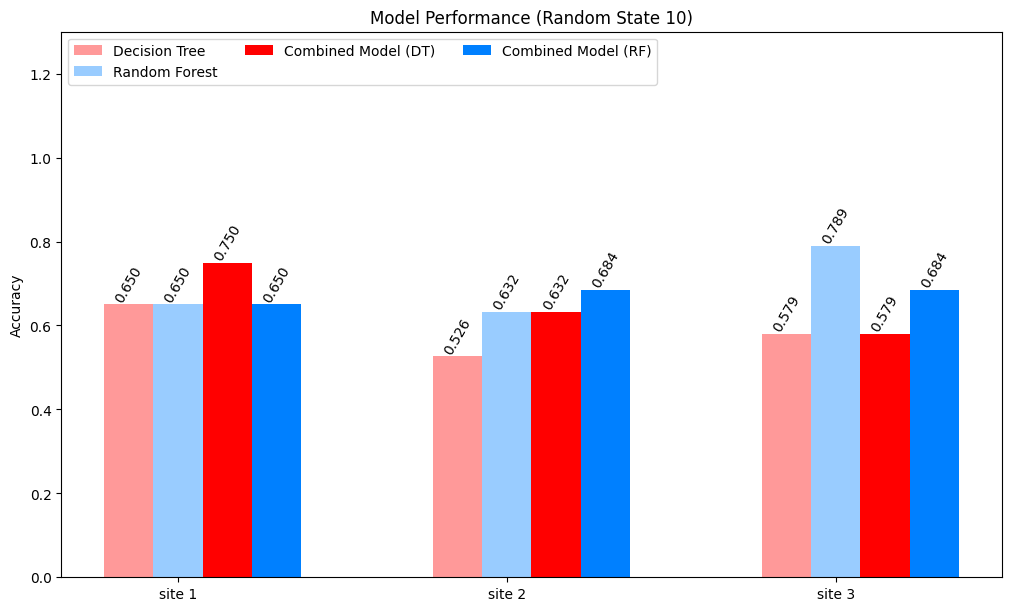

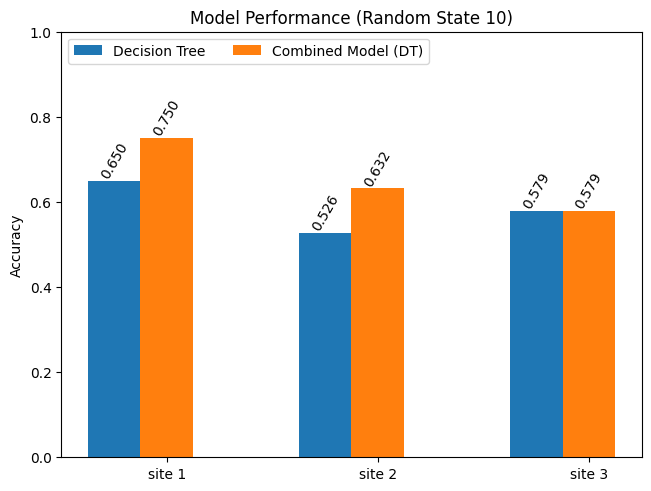

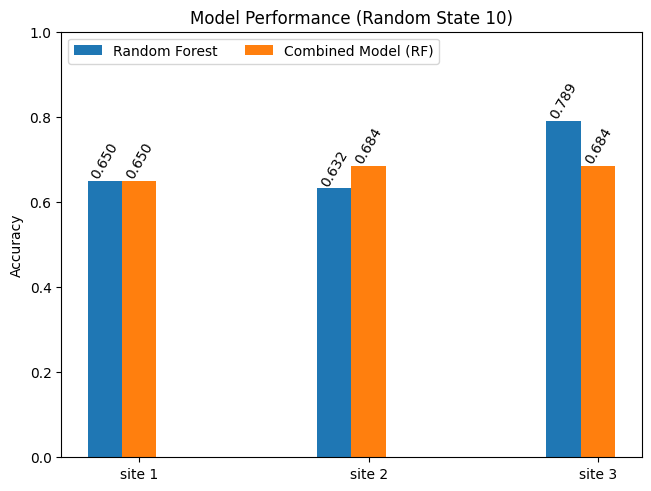

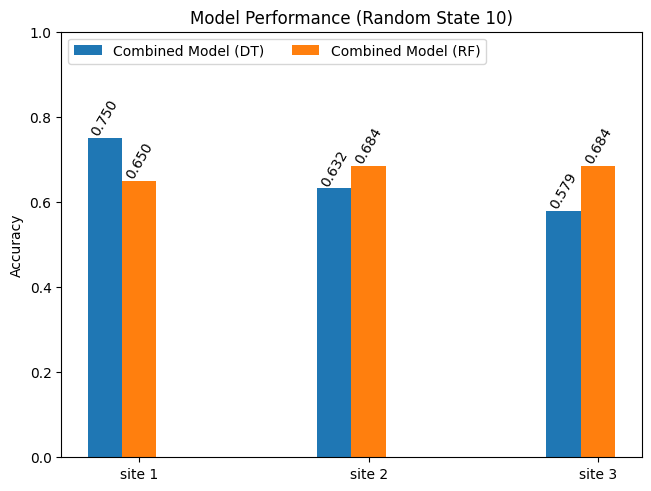

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


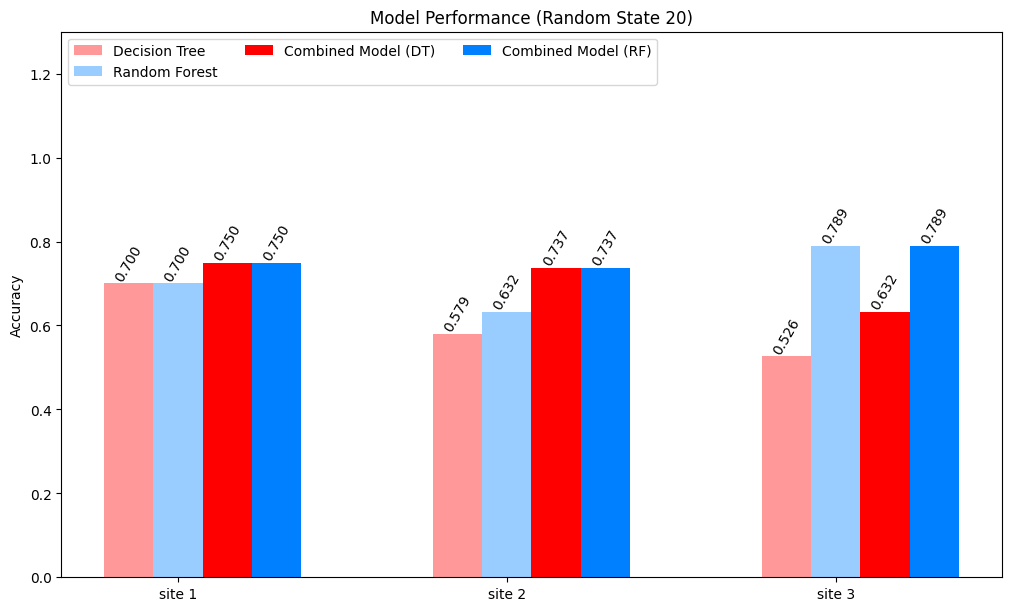

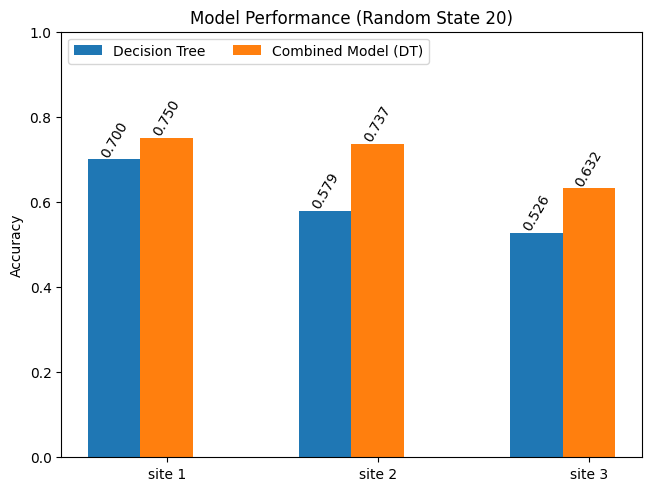

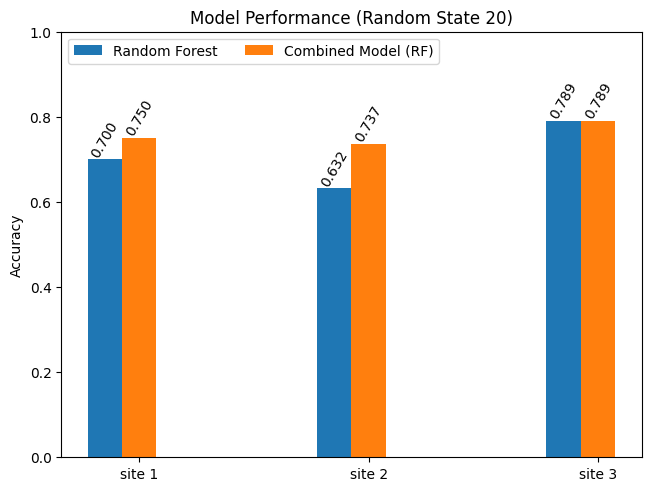

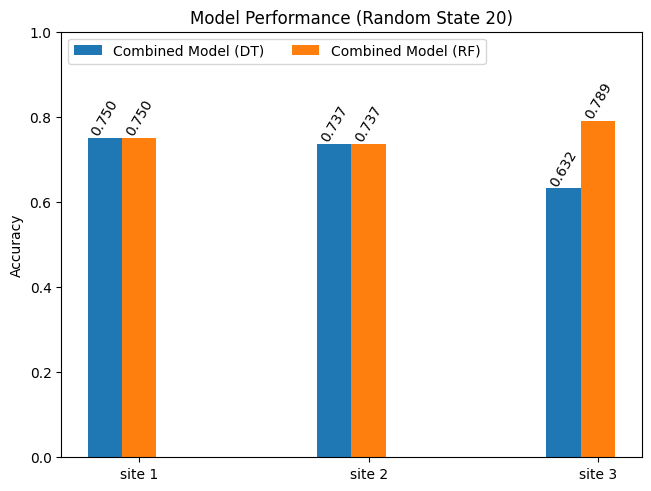

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


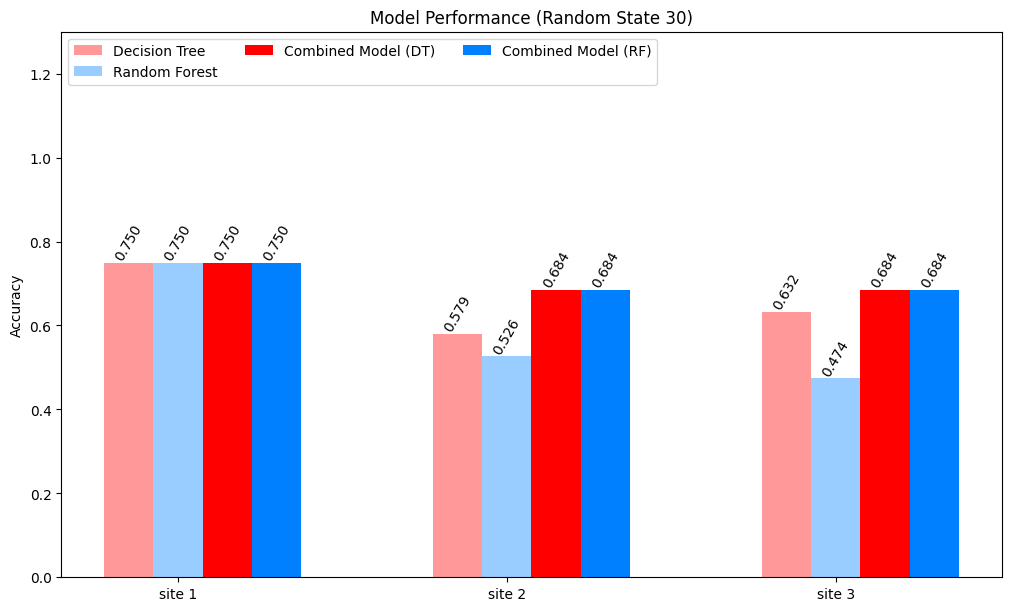

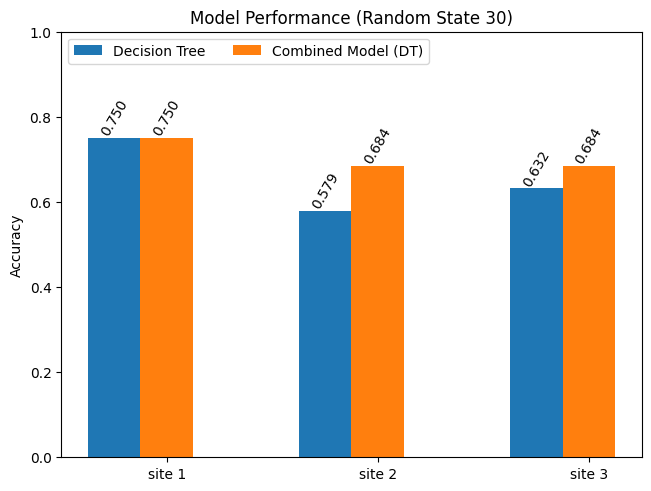

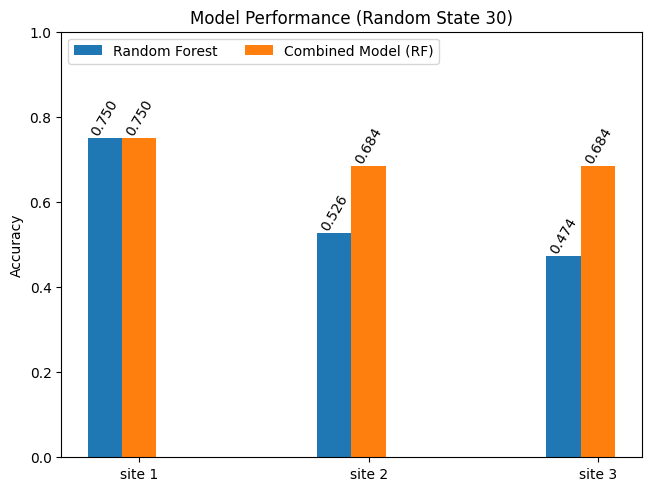

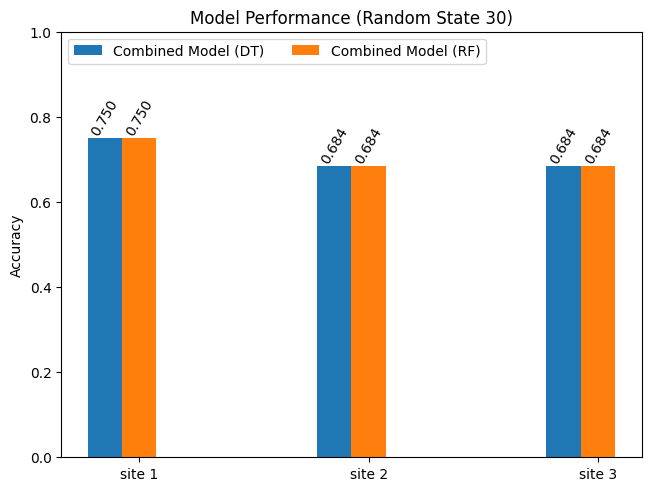

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


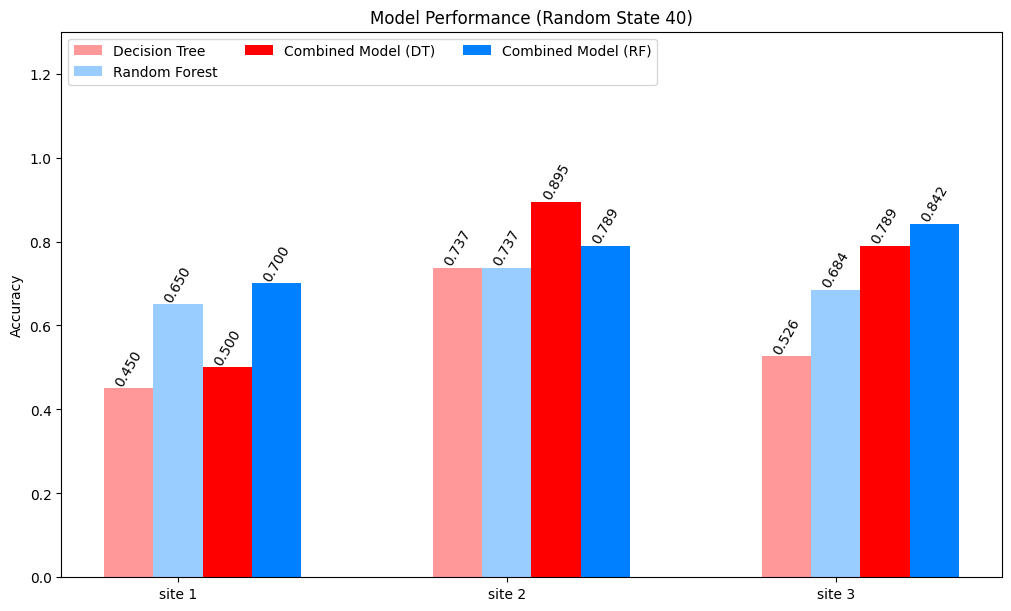

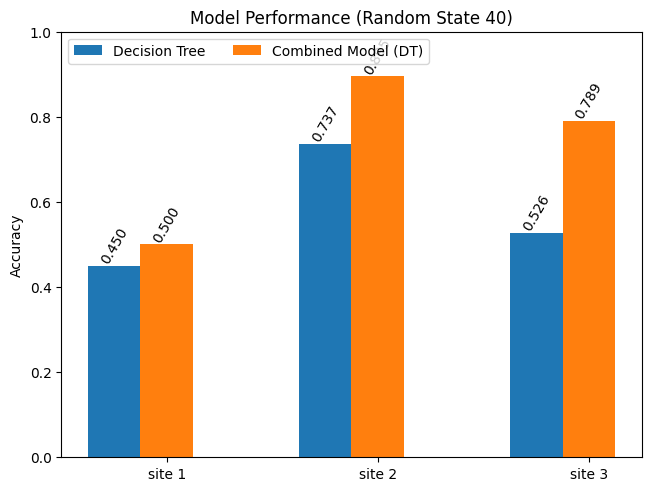

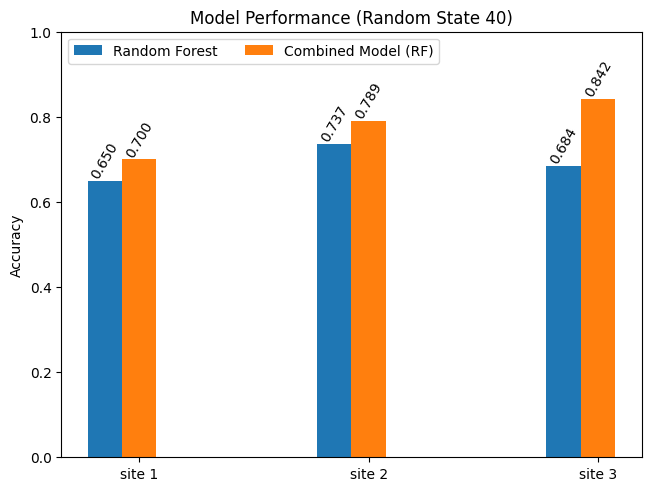

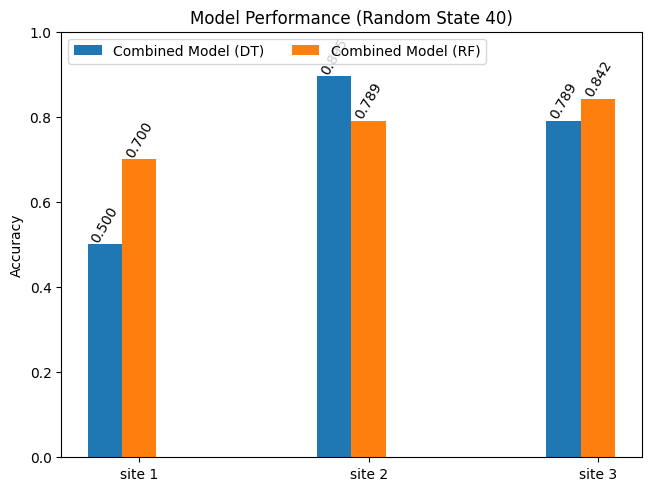

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


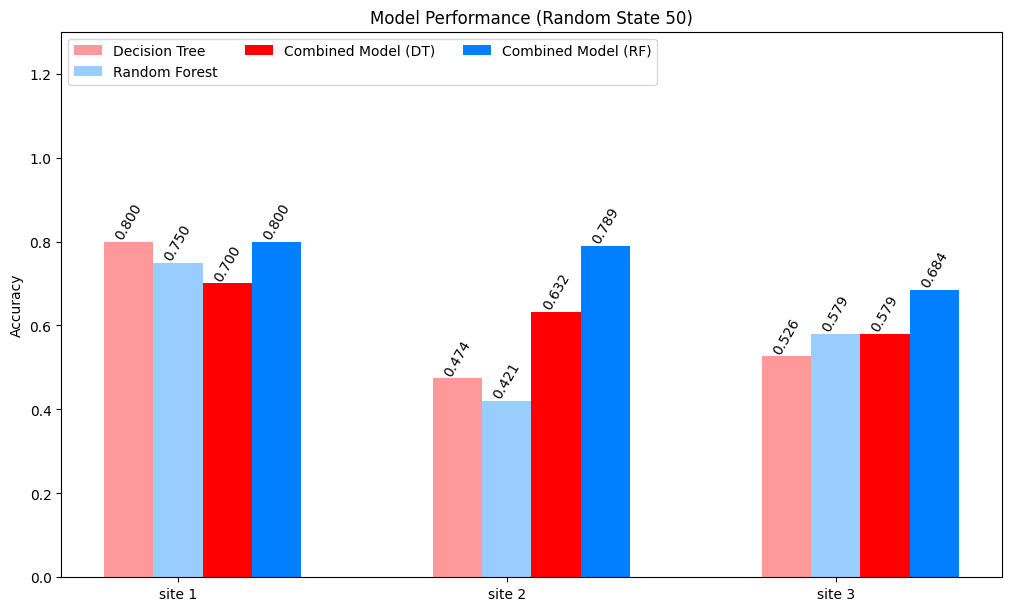

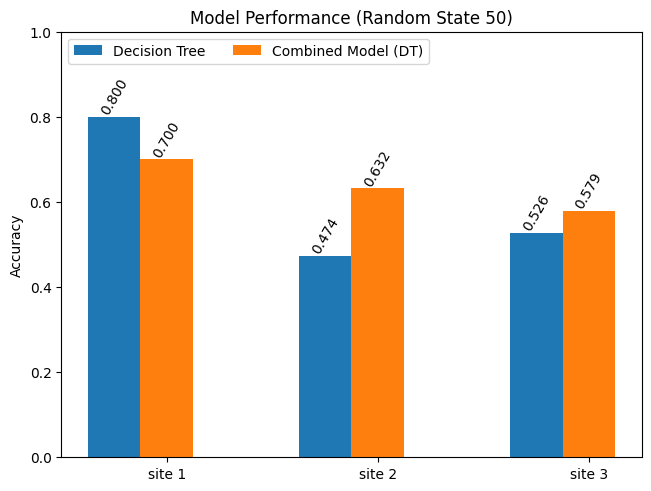

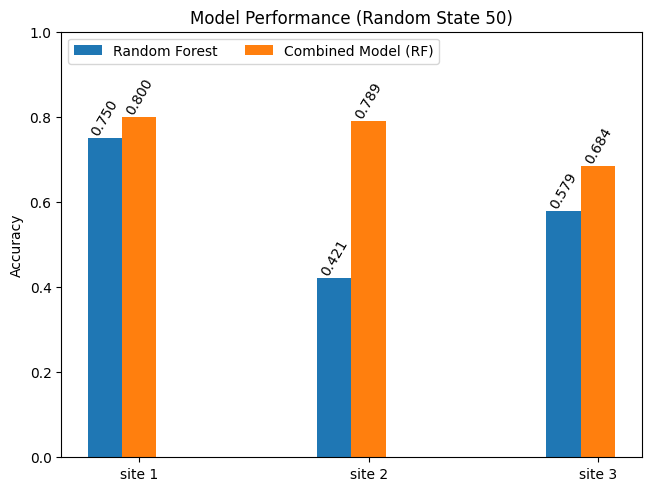

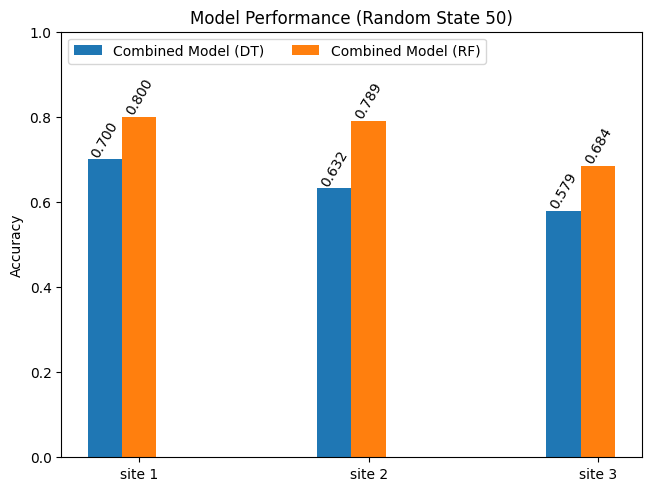

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


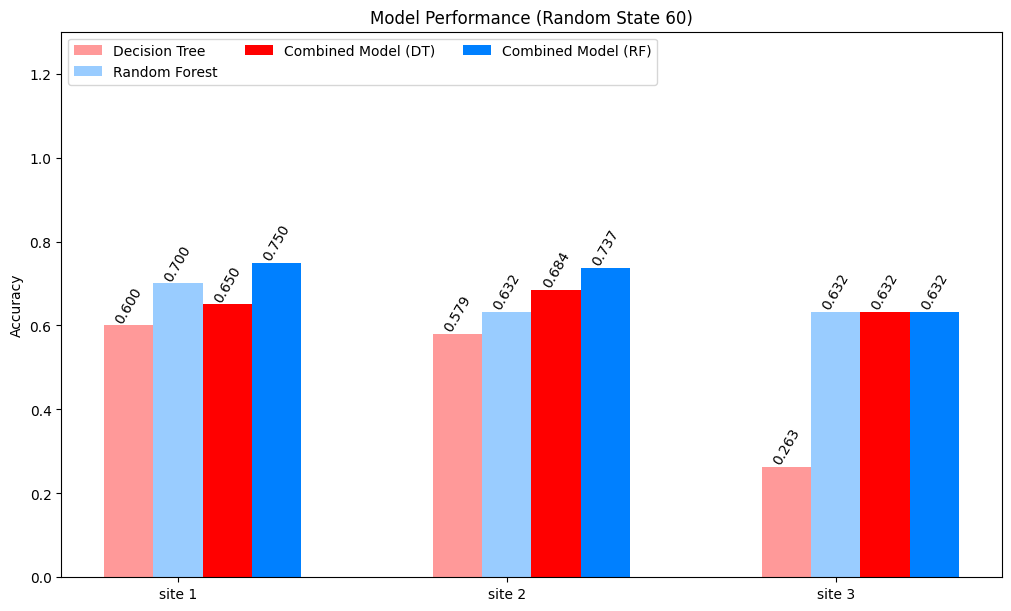

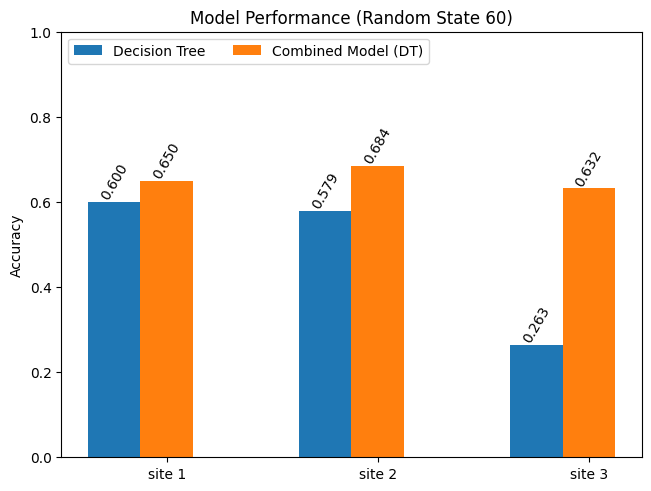

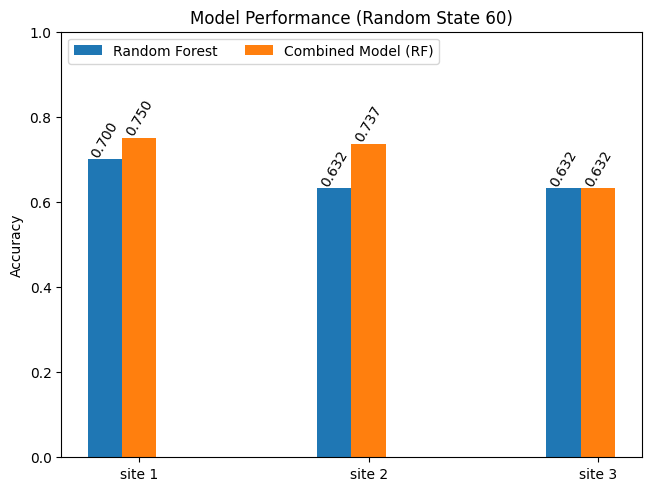

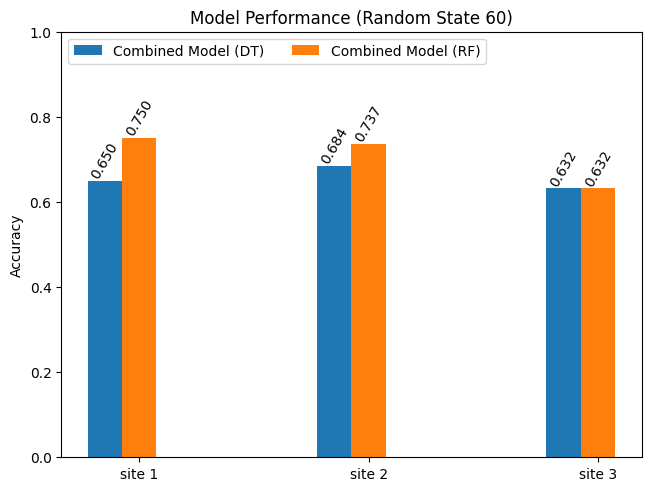

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


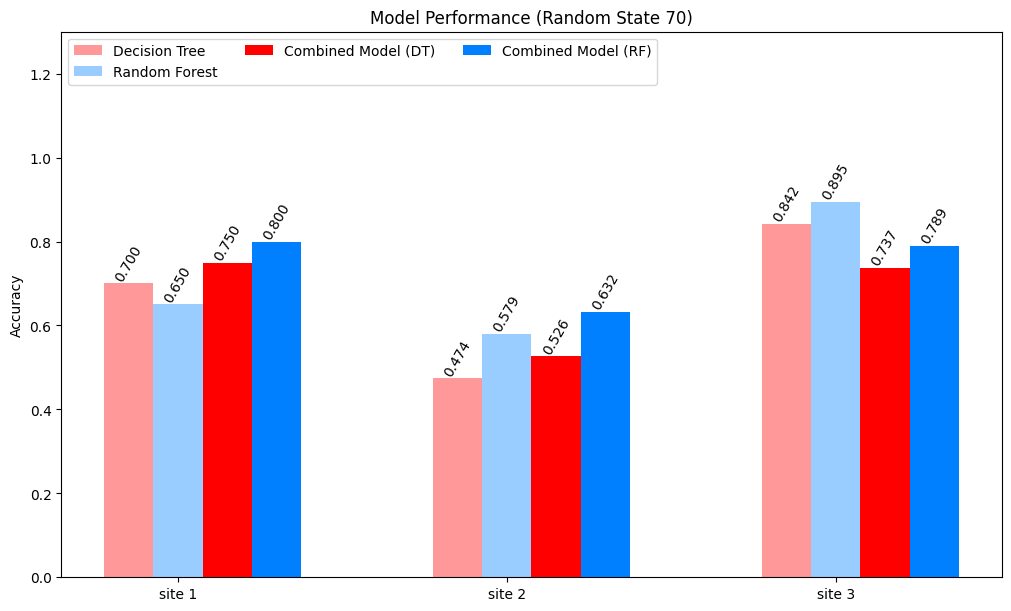

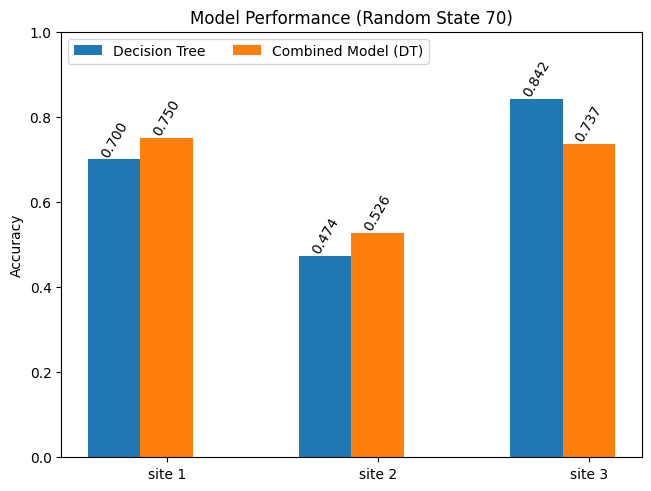

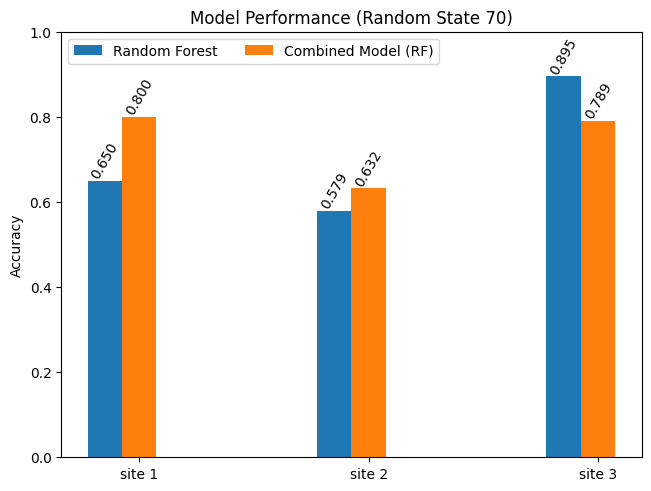

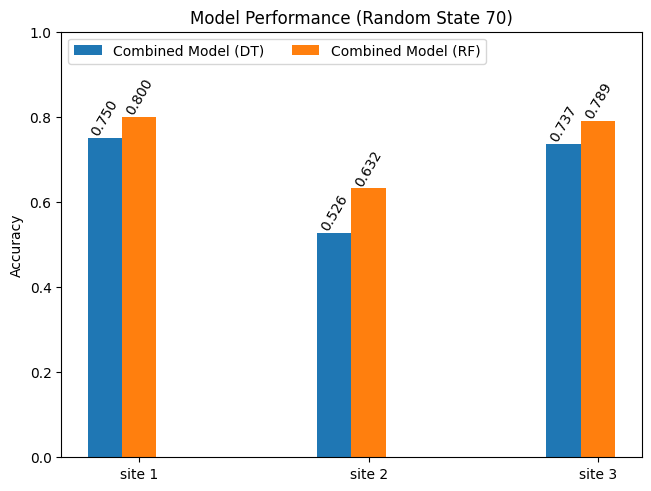

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


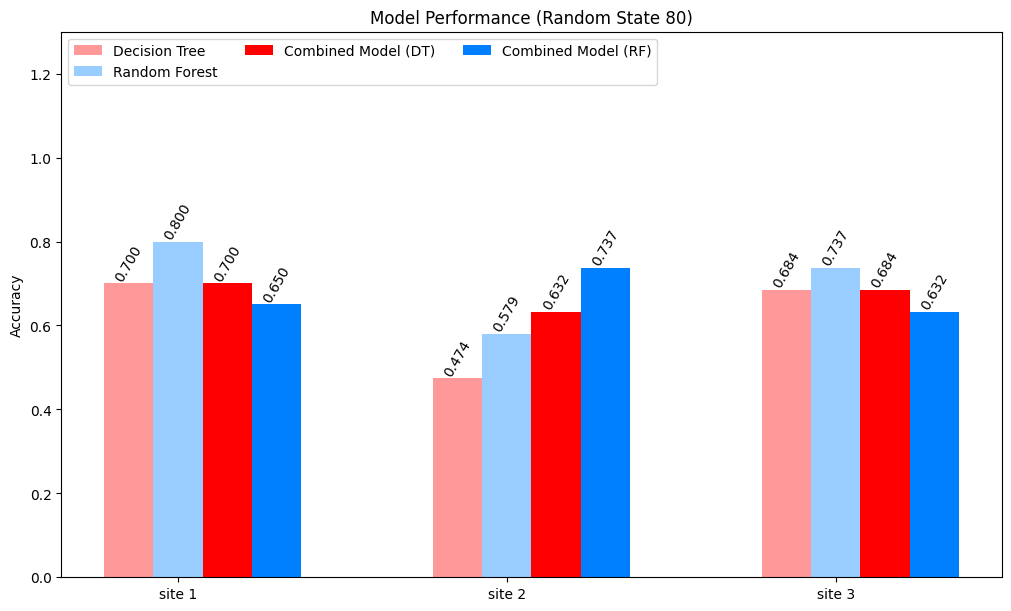

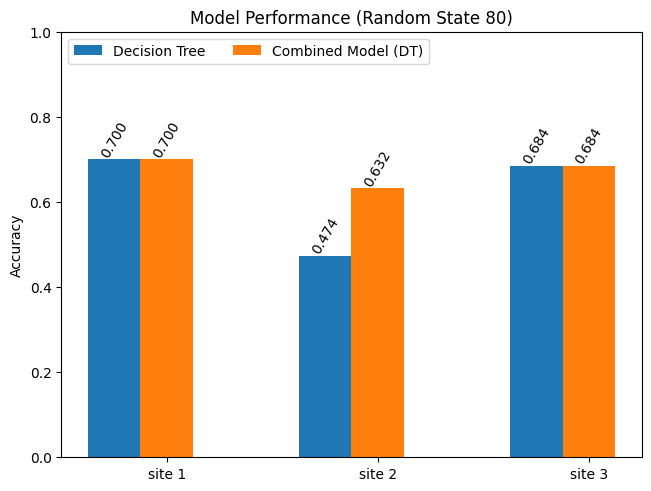

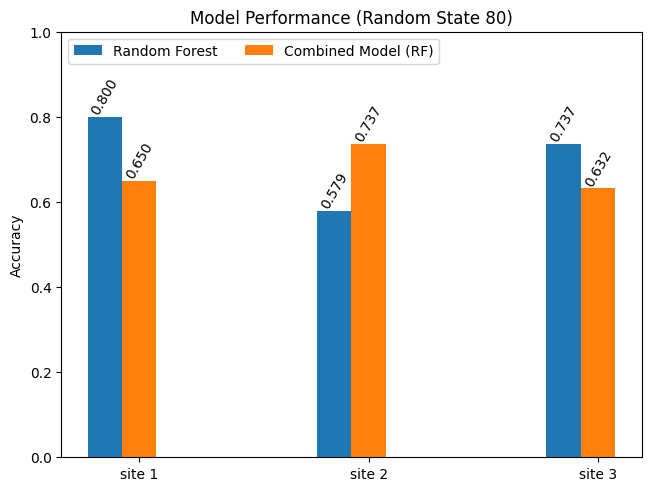

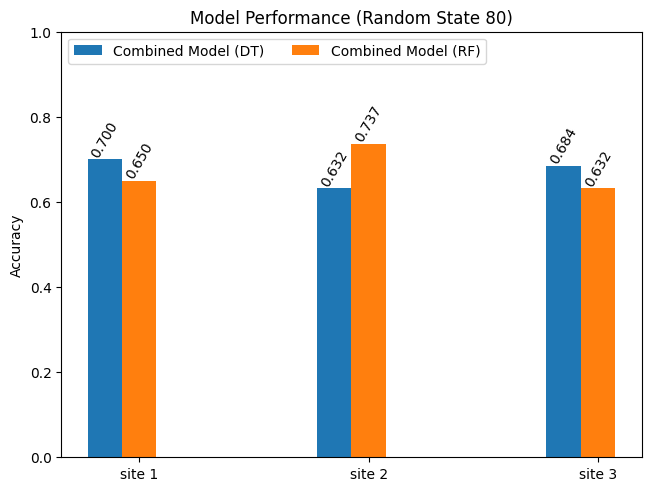

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


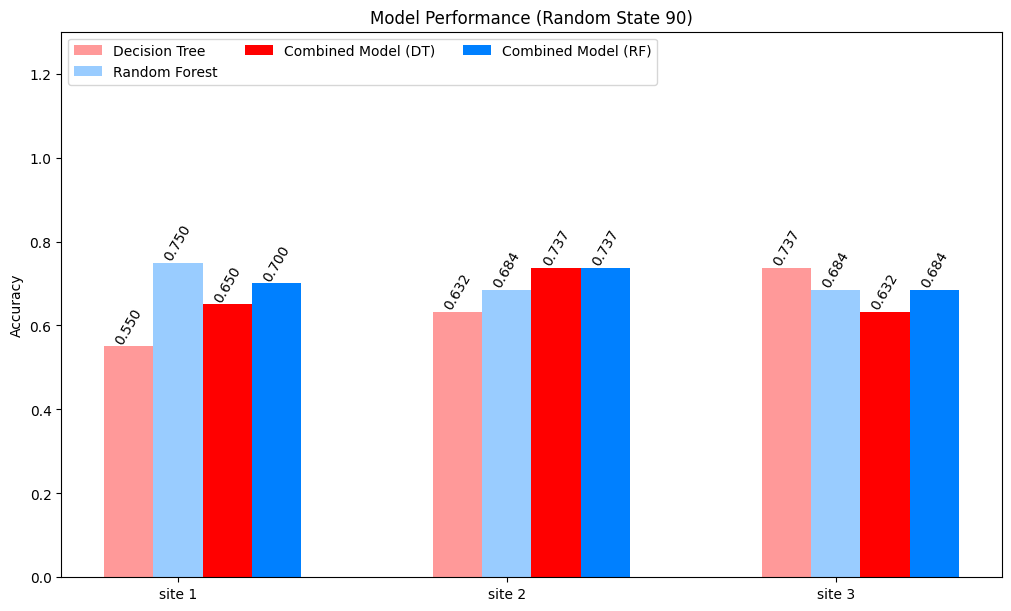

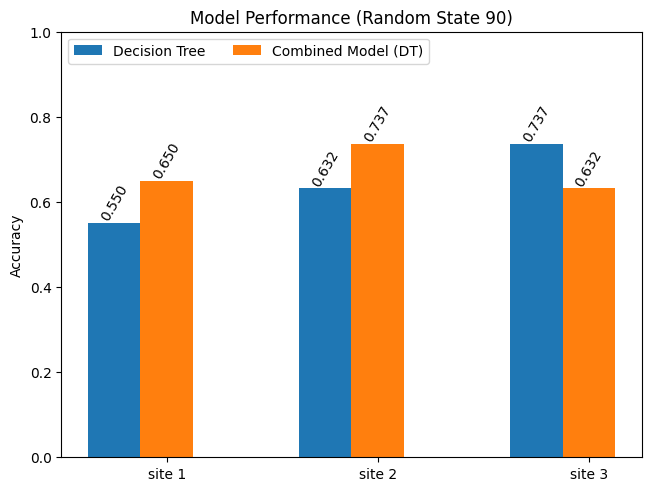

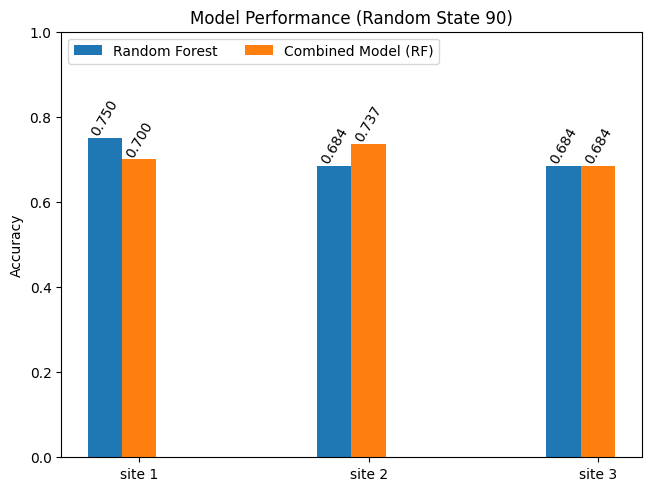

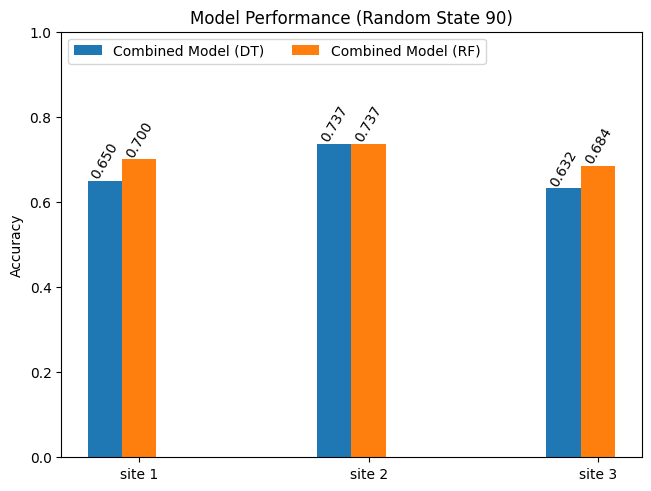

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)


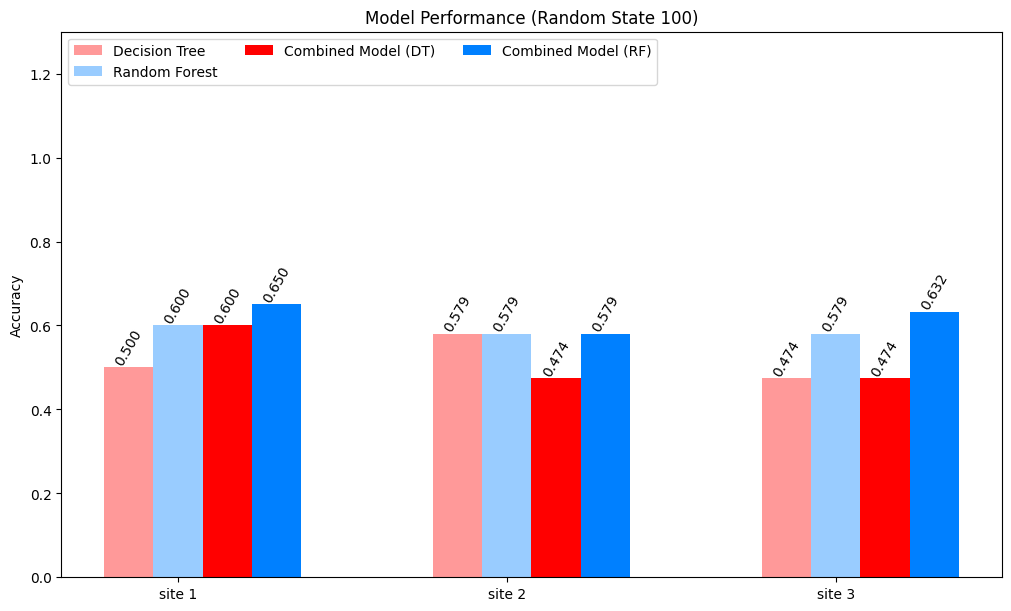

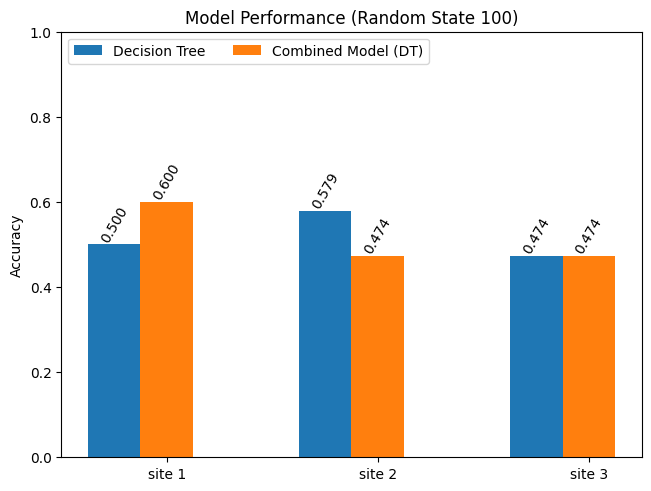

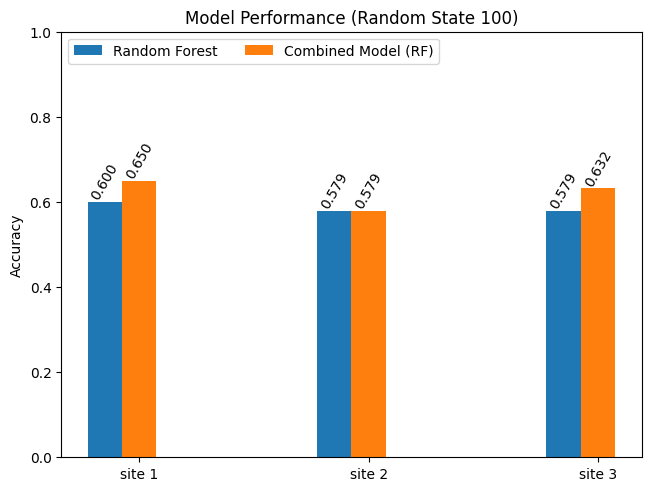

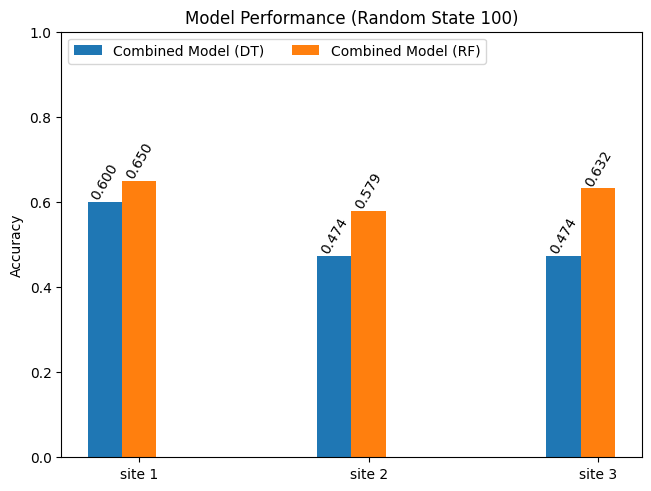

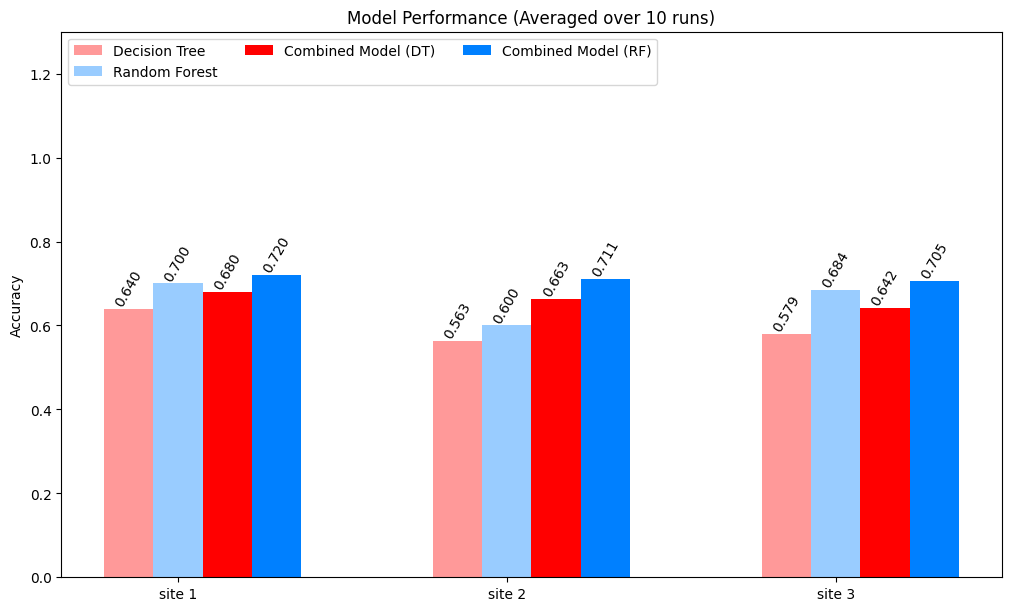

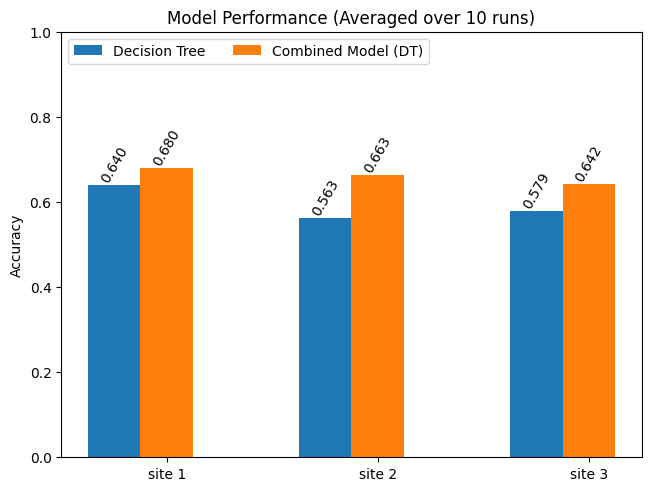

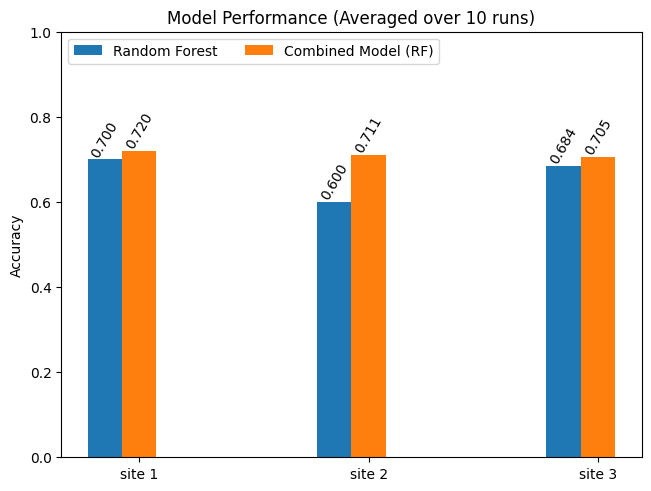

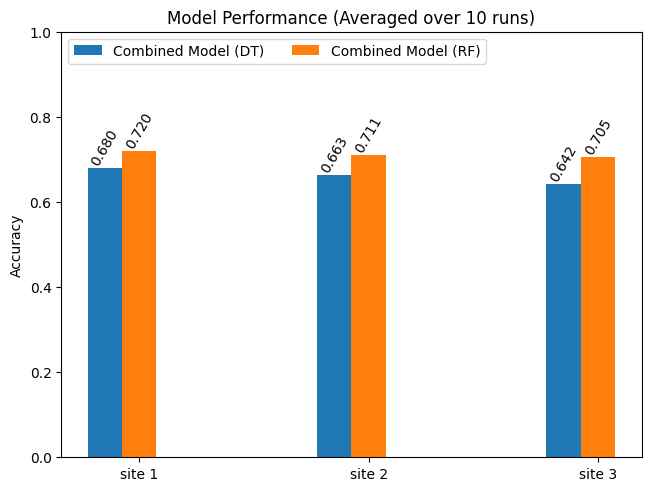

In [ ]:
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

if __name__ == "__main__":
    main(random_states)